# Simple 3-layer multi-class neural network for multi-class classification
+ Network architecture: number of neurons at layer 1, layer 2, output = (10, 100, 3)
+ Activation functions employed at layer 1, layer 2 and output are ReLu, sigmoid, and softmax, respectively.
+ In addition to adding another layer, the ReLu activation function is adopted at layer 1 instead of sigmoid funtion.
+ ReLu tends to prevent the weights not to be drastically reduced as the number of layers grows. 
+ By expermentation, it can be shown that the optimization depends on the learning rate.
+ For example, the learning rate of 0.7 does not lead to the optimization. This leads to the development of more 
+ efficient optimization technique such as moment, ADAM, RMSprop, etc. These techniques try to adjust the learning + rate in accordance with specific property of features of input data.

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
import math

eta = 0.05 # learning rate
epoch = 10000

### ReLu Activation Function
+ ReLu activation function and its derivative are defined.
+ ReLU stands for rectified linear unit, and is a type of activation function. Mathematically, it is defined as 
+ y = max(0, + x). Visually, it looks like the following: ReLU is the most commonly used activation function in neural 
+ networks, especially in CNNs. The rectified linear activation function overcomes the vanishing gradient problem, 
+ allowing models to learn faster and perform better.

In [3]:
def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

def sigmoid_deriv(x):
    return x * (1.0 - x)

def relu(x):
    return np.maximum(0, x)

def relu_deriv(z):
    return (z > 0).astype(float)

def softmax(x):
    # softmax   
    e = np.exp(x - np.max(x))     # x-m is used to avoid overflow of exponent function
    return e / np.sum(e, axis=0) # add in column

### 3-layer Neural Network Model with Softmax Function
+ Softmax function is used at outputs of layer 3.
+ ReLu is used for layer 1 activation function, sigmoid for layer 2, and finally softmax for layer 3, i.e., output layer.

In [4]:
class neuralnetwork:
    # neural network model
    
    def __init__(self, x, w1, w2, w3, y):
        self.inputs   = x.T
        self.target  = y.T        # target
        self.weights1 = w1        # weights at layer 1
        self.weights2 = w2        # weights at layer 2
        self.weights3 = w3        # weights at output layer
        self.b1 = np.zeros((10,1)) # bias at layer 1 
        self.b2 = np.zeros((100,1)) # bias at layer 2 
        self.b3 = np.zeros((3,1)) # bias at output layer   
        self.layer1  = np.zeros((10, self.inputs.shape[1])) # output at layer 1
        self.layer2  = np.zeros((100, self.inputs.shape[1])) # output at layer 2
        self.output   = np.zeros(self.target.shape) # output of output layer
    
    def forwardprop(self):
        # forward processing of inputs and weights using sigmoid activation function
        self.layer1 = relu(np.dot(self.weights1, self.inputs) + self.b1)
        self.layer2 = sigmoid(np.dot(self.weights2, self.layer1) + self.b2)
        self.output = softmax(np.dot(self.weights3, self.layer2) + self.b3)

    def backprop(self):
        # backward processing of appling the chain rule to find derivative of the loss function with respect to weights
        delta3 = (self.output - self.target) 
        delta2 = np.dot(self.weights3.T, delta3) * sigmoid_deriv(self.layer2)
        delta1 = np.dot(self.weights2.T, delta2) * relu_deriv(self.layer1)
        dw3 = np.dot(delta3, self.layer2.T)
        dw2 = np.dot(delta2, self.layer1.T)
        dw1 = np.dot(delta1, self.inputs.T)

        # update the weights with the derivative of the loss function   
        self.weights3 -= eta * dw3 / batchsize
        self.weights2 -= eta * dw2 / batchsize
        self.weights1 -= eta * dw1 / batchsize

        # update biases with the derivative of the loss function
        self.b3 -= eta * np.sum(delta3, axis = 1, keepdims=True) / batchsize # add in row axis, keeping column dimension
        self.b2 -= eta * np.sum(delta2, axis = 1, keepdims=True) / batchsize # add in row axis, keeping column dimension
        self.b1 -= eta * np.sum(delta1, axis = 1, keepdims=True) / batchsize # add in row axis, keeping column dimension

    def predict(self, x):
        # predict the output for a given input x
        self.layer1 = relu(np.dot(self.weights1, x) + self.b1)
        self.layer2 = sigmoid(np.dot(self.weights2, self.layer1) + self.b2)
        self.output = softmax(np.dot(self.weights3, self.layer2) + self.b3)
        return (self.output)
        
     # calculate error
    def calculate_error(self):
        error = np.sum(-self.target * np.log(self.output)) # cross entropy loss function
        return error

    def calculate_accuracy(self):
        # calculate accuracy
        target_label = np.argmax(self.target.T, axis = 1)
        output_label = np.argmax(self.output.T, axis = 1)
        accuracy = 100 * np.sum(target_label == output_label) / float(self.target.T.shape[0])
        return accuracy

### Data Set
+ The sample data is split into training data and test data. The test data is used to test the accuracy of the model
+ for the sample data which was not used at training phase. After testing phase, the model can be used to predict the + new input data. 

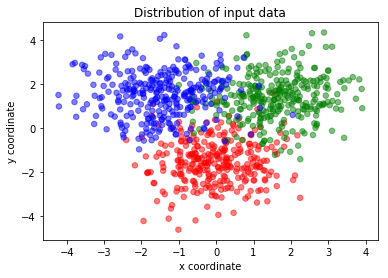

In [7]:
if __name__ == "__main__":

    # get training data set
    samples = 300
    attributes = 2
    classes = 3
 
    np.random.seed(45)
    data1_set = np.random.randn(samples, attributes) + np.array([0.0, -1.5])  # red ball
    data2_set = np.random.randn(samples, attributes) + np.array([1.5, 1.5])   # green ball
    data3_set = np.random.randn(samples, attributes) + np.array([-1.5, 1.5])  # blue ball
    
    feature_set = np.vstack([data1_set, data2_set, data3_set])   
    labels = np.array([0]*samples + [1]*samples + [2]*samples)

    # Initializing colors and building a colormap
    cmap = mpl.colors.ListedColormap(['red', 'green', 'blue'])

    # display data training data set
    # plt.figure(figsize=(10,7))
    plt.title("Distribution of input data")
    plt.scatter(feature_set[:,0], feature_set[:,1], c=labels, cmap =cmap, s= 30, alpha=0.5)
    plt.xlabel('x coordinate')
    plt.ylabel('y coordinate')
    plt.show()

    one_hot_labels = np.zeros((samples*classes, classes))

    for i in range(samples*classes):  
        one_hot_labels[i, labels[i]] = 1

    # concatenate feature data and labels, and shuffle it
    concat_data = np.concatenate((feature_set, one_hot_labels), axis = 1)
    np.random.shuffle(concat_data) # shuffle the concatenated data 

    # extract training data and test data from concatenated data
    train_data = concat_data[0:math.floor(3 * samples * 0.7), :]                 # 70 % samples are selected for training data
    test_data = concat_data[math.floor(3 * samples * 0.3):3 * samples, :]  # 30 % samples are selected for test data
    train_inputdata = train_data[:, 0:2]
    train_targetvalue = train_data[:, 2:5]

    test_inputdata = test_data[:, 0:2]
    test_targetvalue = test_data[:, 2:5]

    # define input and target data for training 
    inputdata = train_inputdata
    targetvalue = train_targetvalue

    batchsize = inputdata.shape[0]

    w1 = np.random.rand(10, inputdata.shape[1]) # number of nueron nodes at the layer 1 is 10
    w2 = np.random.rand(100, 10)                        # number of nueron nodes at the layer 2 is 100
    w3 = np.random.rand(3, 100)                          # number of neuron at output layer is 3

    nn = neuralnetwork(inputdata, w1, w2, w3, targetvalue)

    training_loss = []
    training_accuracy = []

### Training 
+ Training data are processed in batch mode at both forward and backward propagations using batch GD optimizer.
+ Both loss and accuracy at training step are evaluated. 

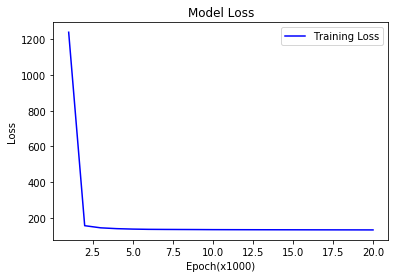

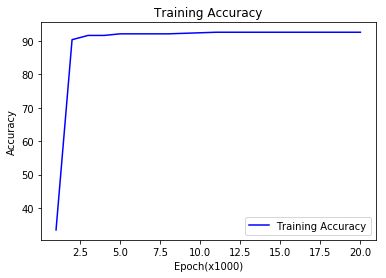

In [9]:
    # training 
    for i in range(epoch):    
        nn.forwardprop()
        nn.backprop()
        if (i % 1000) == 0:
            training_loss.append(nn.calculate_error())
            training_accuracy.append(nn.calculate_accuracy())
         
    # show the training loss
    epoch_count = range(1, len(training_loss) + 1)
    plt.plot(epoch_count, training_loss, 'b-')
    plt.title('Model Loss')
    plt.legend(['Training Loss'])
    plt.xlabel('Epoch(x1000)')
    plt.ylabel('Loss')
    plt.show()

    # show the training accuracy of the model
    plt.plot(epoch_count, training_accuracy, 'b-')
    plt.title('Training Accuracy')
    plt.legend(['Training Accuracy'])
    plt.xlabel('Epoch(x1000)')
    plt.ylabel('Accuracy')
    plt.show()

### Test 
+ Test is peformed to evaluate the accuracy of the trained model for unforseen test data with known target value.
+ Test accuracy is here expressed in percentage. 

In [14]:
    # testing the output for a given test input data and evaluate the test accuracy
    test_output = nn.predict(test_inputdata.T)
    test_target_label = np.argmax(test_output.T, axis = 1)
    test_output_label = np.argmax(test_targetvalue, axis = 1)
    test_accuracy = 100 * np.sum(test_target_label == test_output_label) / float(test_targetvalue.shape[0])
    print("Test accuracy:", test_accuracy)

Test accuracy: 90.63492063492063


### Prediction
+ Predicting the output for a given new input data.

In [15]:
    # For a given input data [1, -1], it is predicated as red ball since the output is [0, 1, 0], i.e. the red ball.
    x_prediction = np.array([[1.0, -1.0]])
    predicted_output = nn.predict(x_prediction.T)
    print("Predicted data based on trained weights: ")
    print("Input: ", x_prediction)
    print("Output: ", predicted_output.T)
    if np.argmax(predicted_output.T) == 0:
        print("it is predicted to be blue ball.")
    elif np.argmax(predicted_output.T) == 1:
        print("it is predicted to be red ball.")
    elif np.argmax(predicted_output.T) == 2:
        print("it is predicted to be green ball.") 

Predicted data based on trained weights: 
Input:  [[ 1. -1.]]
Output:  [[0.92339294 0.06538903 0.01121803]]
it is predicted to be blue ball.
